In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-plate-detection/annotations/Cars339.xml
/kaggle/input/car-plate-detection/annotations/Cars13.xml
/kaggle/input/car-plate-detection/annotations/Cars74.xml
/kaggle/input/car-plate-detection/annotations/Cars16.xml
/kaggle/input/car-plate-detection/annotations/Cars291.xml
/kaggle/input/car-plate-detection/annotations/Cars236.xml
/kaggle/input/car-plate-detection/annotations/Cars429.xml
/kaggle/input/car-plate-detection/annotations/Cars132.xml
/kaggle/input/car-plate-detection/annotations/Cars251.xml
/kaggle/input/car-plate-detection/annotations/Cars51.xml
/kaggle/input/car-plate-detection/annotations/Cars165.xml
/kaggle/input/car-plate-detection/annotations/Cars313.xml
/kaggle/input/car-plate-detection/annotations/Cars240.xml
/kaggle/input/car-plate-detection/annotations/Cars201.xml
/kaggle/input/car-plate-detection/annotations/Cars412.xml
/kaggle/input/car-plate-detection/annotations/Cars227.xml
/kaggle/input/car-plate-detection/annotations/Cars145.xml
/kaggle/input/car-

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 21.5 MB/s eta 0:00:0000:01


In [3]:
dataset_path='/kaggle/input/car-plate-detection'

In [4]:
# regular expression 
import re

def the_number_in_the_string(filename):
    match = re.search('(\d+)',filename)           
    if match:   
        return int(match.group(0))
    else:
        return 0
                      
print(the_number_in_the_string("/kaggle/input/car-plate-detection/images/Cars10.png")) 
print(the_number_in_the_string("no_numbers_here"))

10
0


# 

In [5]:
import os
import cv2
import pandas as pd
import xml.etree.ElementTree as xet
from glob import glob

labels_dict=dict(
    img_path=[],
    xmin=[],
    xmax=[],
    ymin=[],
    ymax=[],
    img_w=[],
    img_h=[]
)

xml_files=glob(f'{dataset_path}/annotations/*.xml')
# print(xml_files)

for filename in sorted(xml_files,key=the_number_in_the_string):
    info=xet.parse(filename)
    root=info.getroot()
    
    member_object=root.find('object')
    labels_info=member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)
    
    img_name=root.find('filename').text
    img_path=os.path.join(dataset_path,'images',img_name)
    
    labels_dict['img_path'].append(img_path)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)
    
    height,width,_=cv2.imread(img_path).shape
    labels_dict['img_w'].append(width)
    labels_dict['img_h'].append(height)
    
alldata=pd.DataFrame(labels_dict)
alldata

# we have created a dataframe 

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,/kaggle/input/car-plate-detection/images/Cars0...,226,419,125,173,500,268
1,/kaggle/input/car-plate-detection/images/Cars1...,134,262,128,160,400,248
2,/kaggle/input/car-plate-detection/images/Cars2...,229,270,176,193,400,400
3,/kaggle/input/car-plate-detection/images/Cars3...,142,261,128,157,400,225
4,/kaggle/input/car-plate-detection/images/Cars4...,156,503,82,253,590,350
...,...,...,...,...,...,...,...
428,/kaggle/input/car-plate-detection/images/Cars4...,142,258,128,157,400,225
429,/kaggle/input/car-plate-detection/images/Cars4...,86,208,166,195,301,400
430,/kaggle/input/car-plate-detection/images/Cars4...,38,116,159,197,400,225
431,/kaggle/input/car-plate-detection/images/Cars4...,55,343,82,147,400,192


In [6]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(alldata,test_size=0.1,random_state=42)
train,val=train_test_split(train,train_size=8/9,random_state=42)

print(f'''
      len(train) = {len(train)}
      len(val) = {len(val)}
      len(test) = {len(test)}
''')


      len(train) = 345
      len(val) = 44
      len(test) = 44



In [7]:
import os
import shutil
import pandas as pd

# Remove the 'datasets' directory if it exists
if os.path.exists('datasets'):
    shutil.rmtree('datasets')

In [8]:
train

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
124,/kaggle/input/car-plate-detection/images/Cars1...,305,320,256,267,400,267
315,/kaggle/input/car-plate-detection/images/Cars3...,12,385,98,181,400,300
282,/kaggle/input/car-plate-detection/images/Cars2...,37,319,145,203,350,263
236,/kaggle/input/car-plate-detection/images/Cars2...,223,250,106,119,400,176
112,/kaggle/input/car-plate-detection/images/Cars1...,49,164,135,191,240,400
...,...,...,...,...,...,...,...
110,/kaggle/input/car-plate-detection/images/Cars1...,286,328,133,159,400,267
255,/kaggle/input/car-plate-detection/images/Cars2...,116,273,156,188,400,267
292,/kaggle/input/car-plate-detection/images/Cars2...,91,137,187,208,400,267
54,/kaggle/input/car-plate-detection/images/Cars5...,148,257,61,118,400,300


In [9]:
def make_split_folder_in_yolo_format(split_name,split_df):
    labels_path = os.path.join('datasets','cars_license_plate_new',split_name,'labels')
    images_path = os.path.join('datasets','cars_license_plate_new',split_name,'images')
    
    if not os.path.exists(labels_path):
        os.makedirs(labels_path)
    if not os.path.exists(images_path):
        os.makedirs(images_path)
    
    for _,row in split_df.iterrows():
        img_name,img_extension = os.path.splitext(os.path.basename(row['img_path']))
        
        x_center=(row['xmin']+row['xmax'])/2/row['img_w']
        y_center=(row['ymin']+row['ymax'])/2/row['img_h']
        width=(row['xmax']-row['xmin'])/row['img_w']
        height=(row['ymax']-row['ymin'])/row['img_h']
    
        label_path = os.path.join(labels_path,f'{img_name}.txt')
        with open(label_path,'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")
            
        shutil.copy(row['img_path'],os.path.join(images_path,img_name+img_extension))
        
    print(f"Created '{images_path}' and '{labels_path}'")

In [10]:
make_split_folder_in_yolo_format("train",train)
make_split_folder_in_yolo_format("test",test)
make_split_folder_in_yolo_format("val",val)

Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'


In [11]:
os.getcwd()

'/kaggle/working'

(-0.5, 470.5, 269.5, -0.5)

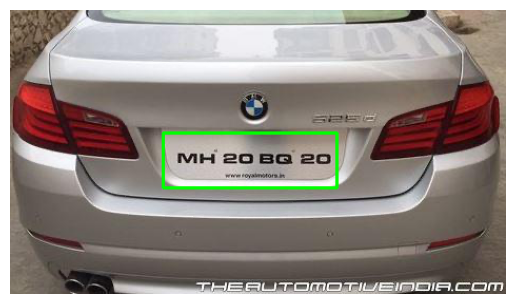

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

image_dir='/kaggle/working/datasets/cars_license_plate_new/train/images'
label_dir='/kaggle/working/datasets/cars_license_plate_new/train/labels'

image_files = sorted(os.listdir(image_dir))
first_image_file=image_files[51]

image_path=os.path.join(image_dir,first_image_file)
label_path=os.path.join(label_dir,os.path.splitext(first_image_file)[0]+'.txt')

image =cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

with open(label_path,'r') as f:
    lines=f.readlines()


for line in lines:
    # Parse the label file line to extract bounding box information
    class_id,x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape

    # Convert YOLO format to bounding box format
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw the bounding box on the image using a green rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
plt.imshow(image)
plt.axis('off')

In [13]:
# Define the content of the datasets.yaml file
datasets_yaml = '''
path: cars_license_plate_new

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

# Write the content to the datasets.yaml file
with open('datasets.yaml', 'w') as file:
    file.write(datasets_yaml)

In [14]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 120MB/s]


In [22]:
model.train(data='datasets.yaml',
            epochs=10,
            batch=16,
            device='cuda',
            imgsz=320,
            verbose=True,
            cache=True)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /kaggle/working/datasets/cars_license_plate_new/train/labels.cache... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<?, ?it/s]
train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:01<00:00, 198.32it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/cars_license_plate_new/val/labels.cache... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<?, ?it/s]
val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 197.26it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.807G      1.548      1.322      1.285          9        320: 100%|██████████| 22/22 [00:02<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]


                   all         44         44      0.839      0.545      0.634       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      0.82G      1.484      1.218      1.239          9        320: 100%|██████████| 22/22 [00:02<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         44         44      0.955       0.75      0.842      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.812G      1.387      1.111      1.166          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]


                   all         44         44      0.881       0.84      0.893      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      0.81G      1.412       1.11      1.186          9        320: 100%|██████████| 22/22 [00:02<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.29it/s]


                   all         44         44      0.834      0.801      0.876      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      0.81G      1.373      1.046      1.167          8        320: 100%|██████████| 22/22 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all         44         44      0.907      0.818      0.907      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.812G      1.391      1.028      1.159          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]


                   all         44         44      0.851      0.932      0.911      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.812G      1.298     0.9519      1.111          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]


                   all         44         44      0.881      0.886      0.898      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.814G      1.307     0.9333      1.111          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]


                   all         44         44      0.882      0.846      0.873      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      0.81G      1.311      0.913      1.118          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]


                   all         44         44      0.946      0.864      0.888      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.812G      1.286     0.8899      1.132          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]


                   all         44         44      0.926      0.858       0.89      0.514

10 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


                   all         44         44      0.923      0.864      0.889      0.514
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train3


lr/pg0,▂▅▇██▇▅▄▂▁
lr/pg1,▂▅▇██▇▅▄▂▁
lr/pg2,▂▅▇██▇▅▄▂▁
metrics/mAP50(B),▁▆█▇███▇▇▇
metrics/mAP50-95(B),▁▄▆▅▆▇█▇██
metrics/precision(B),▁█▄▁▅▂▄▄▇▆
metrics/recall(B),▁▅▆▆▆█▇▆▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▄▄▃▄▁▂▂▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8236a9aec0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

                  epoch        train/box_loss        train/cls_loss  \
0                     1                1.5477               1.32160   
1                     2                1.4844               1.21800   
2                     3                1.3872               1.11130   
3                     4                1.4124               1.10960   
4                     5                1.3729               1.04580   
5                     6                1.3907               1.02790   
6                     7                1.2981               0.95190   
7                     8                1.3070               0.93330   
8                     9                1.3106               0.91298   
9                    10                1.2861               0.88985   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.2850               0.83945               0.54545   
1                1.2391               0.95518               0.75000   
2    

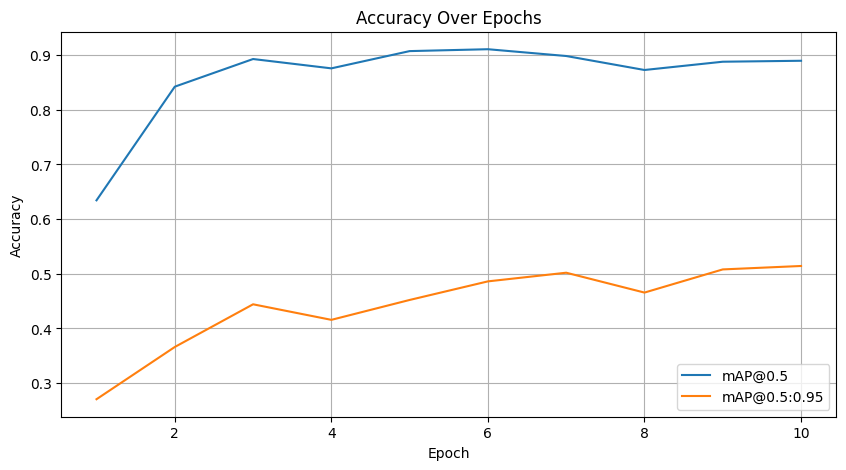

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# har baar run karenge toh train1,train2,train3 aaise karke store honge toh last updated ke liye log_dir use karenge
log_dir =max(glob('runs/detect/train*'),key=the_number_in_the_string)
# print(log_dir)
results = pd.read_csv(os.path.join(log_dir,'results.csv'))
# print(results)
results.columns=results.columns.str.strip()
# print(results)

epochs=results.index+1
map_0_5 =results['metrics/mAP50(B)']
map_0_5_0_95 = results['metrics/mAP50-95(B)']

plt.figure(figsize=(10, 5))
plt.plot(epochs, map_0_5, label='mAP@0.5')
plt.plot(epochs, map_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
model.save('best_license_plate_model.pt')

In [50]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.

    Parameters:
    path_test_car (str): Path to the test image file.
    """
    
    results=model.predict(path_test_car)
    image=cv2.imread(path_test_car)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     print("k")
#     print(results[0].boxes)
#     print("l")
    for result in results:
#         print(result.boxes)
#         print("end")
        for box in result.boxes:
            print("j")
            x1,y1,x2,y2=map(int,box.xyxy[0])
            confidence = box.conf[0]
            
            cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()


image 1/1 /kaggle/input/car-plate-detection/images/Cars39.png: 256x320 1 license_plate, 7.9ms
Speed: 0.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 320)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8409], device='cuda:0')
data: tensor([[222.6758, 183.3368, 328.2919, 208.7581,   0.8409,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (300, 400)
shape: torch.Size([1, 6])
xywh: tensor([[275.4839, 196.0474, 105.6161,  25.4213]], device='cuda:0')
xywhn: tensor([[0.6887, 0.6535, 0.2640, 0.0847]], device='cuda:0')
xyxy: tensor([[222.6758, 183.3368, 328.2919, 208.7581]], device='cuda:0')
xyxyn: tensor([[0.5567, 0.6111, 0.8207, 0.6959]], device='cuda:0')
j


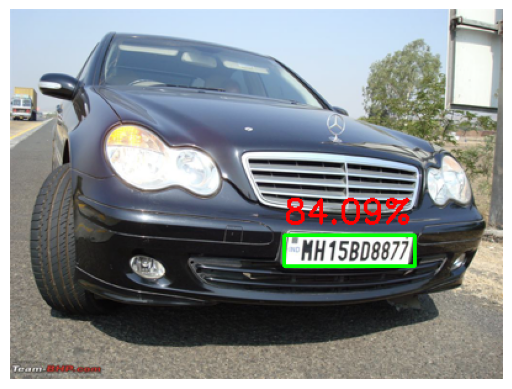

In [51]:
predict_and_plot(test.iloc[14].img_path)

In [27]:
test.iloc[4].img_path

'/kaggle/input/car-plate-detection/images/Cars364.png'

In [26]:
test

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
425,/kaggle/input/car-plate-detection/images/Cars4...,211,301,103,132,500,232
75,/kaggle/input/car-plate-detection/images/Cars7...,209,218,196,201,400,248
181,/kaggle/input/car-plate-detection/images/Cars1...,69,128,195,209,225,400
30,/kaggle/input/car-plate-detection/images/Cars3...,155,200,169,182,400,240
364,/kaggle/input/car-plate-detection/images/Cars3...,61,115,140,167,400,242
408,/kaggle/input/car-plate-detection/images/Cars4...,160,187,217,228,400,267
253,/kaggle/input/car-plate-detection/images/Cars2...,25,64,124,137,400,210
155,/kaggle/input/car-plate-detection/images/Cars1...,150,203,177,190,400,267
168,/kaggle/input/car-plate-detection/images/Cars1...,82,137,95,125,400,225
415,/kaggle/input/car-plate-detection/images/Cars4...,133,261,157,192,400,300
